In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [63]:
df = pd.read_csv('wine-clustering.csv')
print('Mempunyai {} baris dan {} Kolom'.format(df.shape[0], df.shape[1]))

Mempunyai 178 baris dan 13 Kolom


In [64]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [66]:
# normalisasi pada dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df)

In [79]:
data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [67]:
from sklearn.cluster import KMeans
# kmeans clustering
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

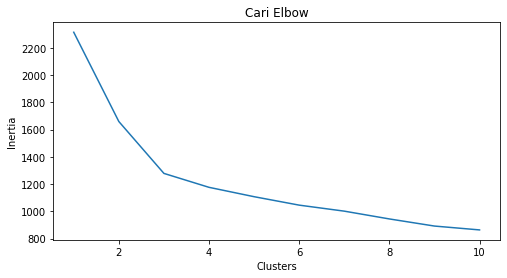

In [68]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [69]:
# algoritm PCA
from sklearn.decomposition import PCA
pca = PCA()
data_clusters = data.copy()
data_clusters = pca.fit_transform(data_clusters)

C:\Users\Arsyad\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


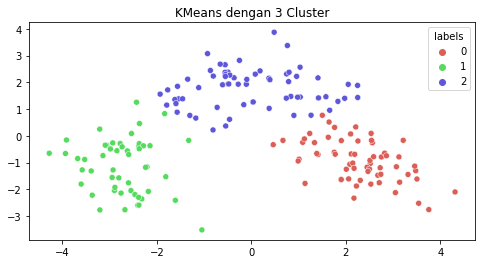

In [70]:
km5 = KMeans(n_clusters=3).fit(data)

df['labels'] = km5.labels_

plt.figure(figsize=(8,4))
sns.scatterplot(data_clusters[:,0], data_clusters[:,1], hue=df['labels'],
                palette=sns.color_palette('hls', 3))
plt.title('KMeans dengan 3 Cluster')
plt.show()


C:\Users\Arsyad\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


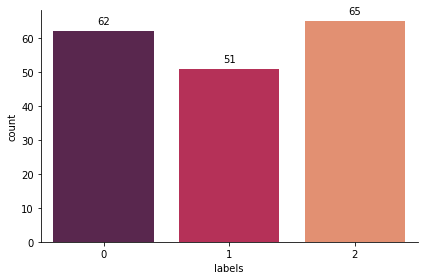

In [78]:
# melihat total dataset berdasarkan label
ax = sns.countplot(df['labels'], palette='rocket')
for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                            (p.get_x() + p.get_width() / 2., p.get_height()),  
                            ha = 'center',  
                            va = 'center',  
                            xytext = (0, 10),  
                            textcoords = 'offset points') 

        # Setting Plot  
        sns.despine(right=True, top = True)  
        # axs[i].axes.yaxis.set_visible(False) 
        plt.tight_layout()

In [86]:
print('Tipe tipe clustering : ', df['labels'].sort_values().unique())

Tipe tipe clustering :  [0 1 2]
